C:\Users\hrish\George Mason University - O365 Production\DAEN 690 - Group Only-GRP - 063022


C:\Users\hrish\AppData\Local\Temp\ipykernel_20032\3861678174.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S.%f').astype('datetime64[ns]')


46   46
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               279552    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 279,809
Trainable params: 279,809
Non-trainable params: 0
_________________________________________________________________
35
46
36   10
36   10
(10, 700, 16)
Epoch 1/20


C:\Users\hrish\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 7s 7s/step - loss: 0.8186 - accuracy: 0.2500 - val_loss: 0.6904 - val_accuracy: 0.6000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.6677 - accuracy: 0.5833 - val_loss: 0.6499 - val_accuracy: 0.7000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.5518 - accuracy: 0.7500 - val_loss: 0.6185 - val_accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.4640 - accuracy: 0.8056 - val_loss: 0.5944 - val_accuracy: 0.7000
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 0.4070 - accuracy: 0.8611 - val_loss: 0.5646 - val_accuracy: 0.7000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.3666 - accuracy: 0.8611 - val_loss: 0.5560 - val_accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.3408 - accuracy: 0.8611 - val_loss: 0.5453 - val_accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 3s

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/lstm_model\assets


INFO:tensorflow:Assets written to: saved_model/lstm_model\assets


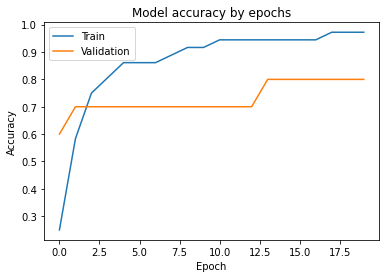

In [1]:
%cd "C:\Users\hrish\George Mason University - O365 Production\DAEN 690 - Group Only-GRP - 063022"

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing import sequence

# collect all files
first_file = pd.read_csv('SimData_2022.06.30_10.27.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

second_file = pd.read_csv('SimData_2022.06.30_13.01.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

third_file = pd.read_csv('SimData_2022.06.30_13.05.32.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fourth_file = pd.read_csv('SimData_2022.06.30_13.42.04.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

fifth_file = pd.read_csv('SimData_2022.07.07_09.56.57.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

sixth_file = pd.read_csv('SimData_2022.07.07_14.32.46.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)

df = pd.concat([first_file, second_file, third_file, fourth_file,fifth_file, sixth_file])

df.head(10)
df['turnDirection'] = df['trueHeading'].rolling(window = 5).apply(lambda x: x[-1]-x[0], raw=True)
df['Altdiff'] = df['absoluteAltitude'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
df['groundSpeedDiff'] = df['groundSpeed'].rolling(window = 5).apply(lambda x: x[0]- x[-1], raw = True)
df['turnDirection']  = df['turnDirection'].fillna(0)
df['Altdiff'] = df['Altdiff'].fillna(0)
df['groundSpeedDiff']=df['groundSpeedDiff'].fillna(0)
df.head(10)

#select relevant columns to analyze
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
          'turnDirection',
          'Altdiff',
          'groundSpeedDiff'
          
]]

# Convert timestamp into year month day and hour in seconds 
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S.%f').astype('datetime64[ns]')
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()


#Data labelling
df3['HoverOrNot'] = 0

df3.loc[(df3['datetime'].between('2022-06-30 14:28:13' , '2022-06-30 14:33:12' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:34:10' , '2022-06-30 14:38:29' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:40:10' , '2022-06-30 14:43:40' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:46:00' , '2022-06-30 14:55:55' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 14:57:10' , '2022-06-30 15:00:16' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:01:20' , '2022-06-30 15:07:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:07:38' , '2022-06-30 15:10:38' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:12:02' , '2022-06-30 15:18:30' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:20:18' , '2022-06-30 15:23:52' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:25:30' , '2022-06-30 15:30:17' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:36:45' , '2022-06-30 15:40:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-06-30 15:42:28' , '2022-06-30 15:55:20' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 13:58:38' , '2022-07-07 14:02:54' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:03:40' , '2022-07-07 14:11:19' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:14:55' , '2022-07-07 14:21:03' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:22:19' , '2022-07-07 14:23:18' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:24:20' , '2022-07-07 14:35:00' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:36:00' , '2022-07-07 14:45:24' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['datetime'].between('2022-07-07 14:46:50' , '2022-07-07 14:47:20' , inclusive='both')),['HoverOrNot']] = 1

df3.loc[(df3['hasWeightOnWheels'] == 1), ['HoverOrNot']] = 0
df5=df3
df5.head(5)

from pandas.plotting import scatter_matrix
from matplotlib import cm

#select relevant features
feature_names = [
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
          'turnDirection',
          'Altdiff',
          'groundSpeedDiff',
        'HoverOrNot']               
                
                
x = df5[feature_names]
y = df5['HoverOrNot']
len(feature_names)

# convert dataframe to a 2-D numpy arrays where each object in the array is a numpy array of maneuver

def df_to_arr_by_sequence(df_input):
    check_hover=0
    previous=0
    rotorcraft_np_arr_main=[]
    rotorcraft_np_arr_target=[]
    for i in range(len(df_input)):
        if(df_input.loc[i,"HoverOrNot"]!=check_hover):
            data = df_input.iloc[previous:i]
            data = data.drop(columns=['HoverOrNot'])
            rotorcraft_np_arr_main.append(data)
            rotorcraft_np_arr_target.append(check_hover)
            check_hover=1 if check_hover == 0 else 0
            previous=i
    return rotorcraft_np_arr_main,rotorcraft_np_arr_target

x_main,x_target = df_to_arr_by_sequence(x)
 
x_main = np.asarray(x_main, dtype=object)
x_target = np.asarray(x_target, dtype=np.float32)
print(x_main.size, " ", x_target.size)
pd.Series(x_main).describe()
x_target[0]

from keras_preprocessing.sequence import pad_sequences

#sequence length needs to be tuned based on accuracy for a model
seq_len = 700
final_seq=pad_sequences(x_main, maxlen=seq_len, padding='post', dtype='float', truncating='post')
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, len(feature_names)-1)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#split data in training & testing 

type(final_seq)
X_train = final_seq[np.r_[0:int(len(final_seq)*0.8)],:]
X_test = x_target[np.r_[0:int(len(x_target)*0.8)]]
print(len(X_train)-1)
Y_train = final_seq[np.r_[int(len(final_seq)*0.8):(len(final_seq))],:]
Y_test = x_target[np.r_[int(len(x_target)*0.8):(len(x_target))]]
print(len(final_seq))
print(len(X_train)," ",len(Y_train))
print(len(X_test)," ",len(Y_test))
print(Y_train.shape)
            
# Initiate the LSTM model & train it with the numpy array
adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
rotorcraft_acc = model.fit(X_train, X_test, epochs=20, batch_size=128, callbacks=[chk], validation_data=(Y_train,Y_test))
                             

from sklearn.metrics import accuracy_score
test_preds = (model.predict(Y_train) > 0.5).astype("int32")
accuracy_score(Y_test, test_preds)

# Save model to be used in validation
!mkdir -p saved_model
model.save('saved_model/lstm_model')

#Plot epochs vs accuracy
plt.plot(rotorcraft_acc.history['accuracy'])
plt.plot(rotorcraft_acc.history['val_accuracy'])
plt.title('Model accuracy by epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
